In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 115MB/s]


In [ ]:
import zipfile
zipref=zipfile.ZipFile("/content/sms-spam-collection-dataset.zip",'r')
zipref.extractall('/content')
zipref.close()

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

In [ ]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['v1']=lb.fit_transform(df['v1'])
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64

In [ ]:
label_counts = df['v1'].value_counts()
label_counts

0    4516
1     653
Name: v1, dtype: int64

In [ ]:
df['count_char']=df['v2'].apply(len)

In [ ]:
df

,v1,v2,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
import nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['word_count']=df['v2'].apply(lambda x :len(nltk.word_tokenize(x)))

In [ ]:
df['sent_count']=df['v2'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [ ]:
df

,v1,v2,count_char,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[['count_char','word_count','sent_count']].describe()

,count_char,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['v1']==0][['count_char','word_count','sent_count']].describe()

,count_char,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['v1']==1][['count_char','word_count','sent_count']].describe()

,count_char,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
x=df['v2']
y=df['v1']

In [ ]:
x=x.str.lower()

In [ ]:
x

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5169, dtype: object

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from textblob import TextBlob
def correctspell(text):
  textblob=TextBlob(text)
  textblob.correct()

In [ ]:
x=x.apply(correctspell)

KeyboardInterrupt: ignored

In [ ]:
def remove_stopward(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)

  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
x=x.apply(remove_stopward)

In [ ]:
import string , time
string.punctuation
exclude=string.punctuation

In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
x=x.apply(remove_punc1)

In [ ]:
x

0       go  jurong point crazy available   bugis n gre...
1                                 ok lar joking wif u oni
2       free entry  2  wkly comp  win fa cup final tkt...
3                   u dun say  early hor u c already  say
4        nah  dont think  goes  usf  lives around  though
                              ...                        
5567       2nd time   tried 2 contact u u    å£750 pou...
5568                         ì b going  esplanade fr home
5569                     pity   mood   soany  suggestions
5570     guy   bitching   acted like id  interested  b...
5571                                    rofl  true   name
Name: v2, Length: 5169, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def step_words(text):
  return " ".join([ps.stem(word) for word in text.split()])


In [ ]:
x=x.apply(step_words)

In [ ]:
x

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å£750 pound prize 2...
5568                              ì b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: v2, Length: 5169, dtype: object

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['v1']==1]['v2'].str.cat(sep=""))

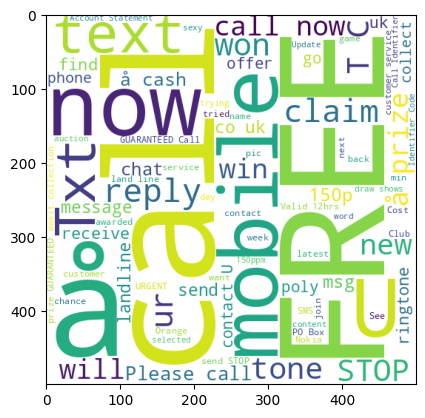

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['v1']==0]['v2'].str.cat(sep=""))

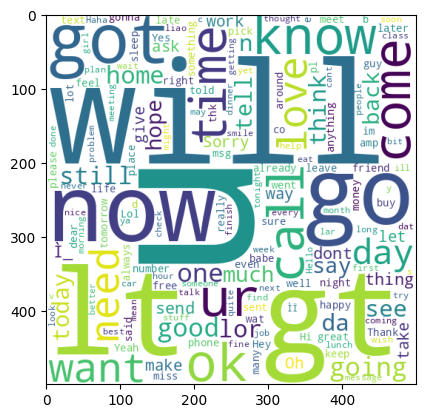

In [ ]:
plt.imshow(ham_wc)

model building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['v2']).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [ ]:
mb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score

In [ ]:
y_pre=mb.predict(x_test)
print(accuracy_score(y_test,y_pre))
print(precision_score(y_test,y_pre))


0.97678916827853
1.0


In [ ]:
!pip install pickle
import pickle
pickle.dump(tfidf,open('vectorizr.pkl','wb'))
pickle.dump(mb,open('spamd.pkl','wb'))

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
